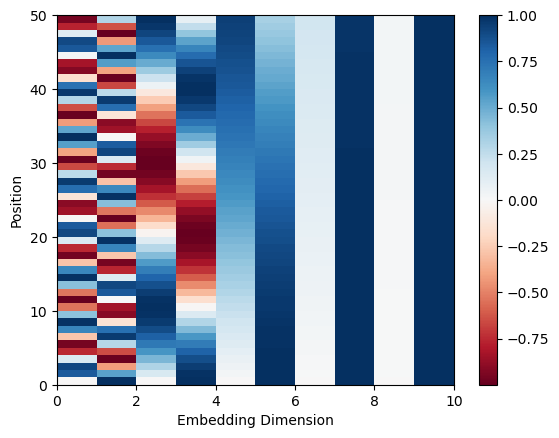

In [1]:
import math
import torch
from torch import nn
from matplotlib import pyplot as plt

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len, dropout=0.1):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1) #(50,1)텐서 생성
        div_term = torch.exp(
            torch.arange(0, d_model, 2)*(-math.log(10000.0)/d_model)
        ) #arange를 통해 0부터 d_model까지 2간격으로 정수 생성
        #64 텐서 생성

        pe = torch.zeros(max_len, 1, d_model)
        pe[:,0,0::2] = torch.sin(position*div_term) #50*64개 값 들어감
        pe[:,0,1::2] = torch.cos(position*div_term)

        self.register_buffer("pe",pe) #모델이 매개변수를 갱신하지 않도록 설정
        #즉 위치 인코딩을 한 값이 변하지 않도록 buffer로 지정해준다는 의미. buffer로 지정하면 최적화를 진행하지 않음.


    def forward(self, x):
        x = x+self.pe[: x.size(0)]
        return self.dropout(x)
    
encoding = PositionalEncoding(d_model=10, max_len=50) #임베딩 차원, 최대 시퀀스

plt.pcolormesh(encoding.pe.numpy().squeeze(), cmap="RdBu")
plt.xlabel("Embedding Dimension")
plt.xlim((0,10))
plt.ylabel("Position")
plt.colorbar()
plt.show()

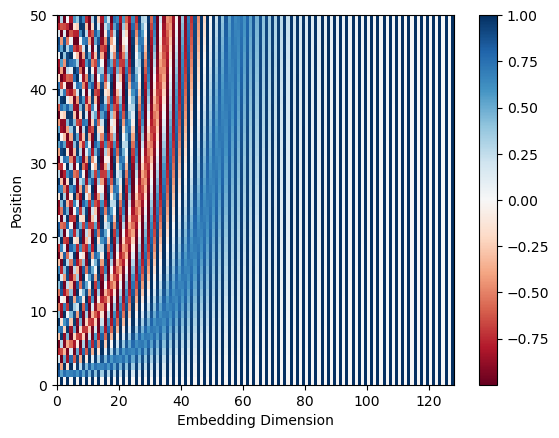

In [2]:
encoding = PositionalEncoding(d_model=128, max_len=50) #임베딩 차원, 최대 시퀀스

plt.pcolormesh(encoding.pe.numpy().squeeze(), cmap="RdBu")
plt.xlabel("Embedding Dimension")
plt.xlim((0,128))
plt.ylabel("Position")
plt.colorbar()
plt.show()